# Explorations of the REF 2021 submission data

Notes
- `Not specified - PP ADDED` is a category added during pre-processing to all string fields to replace missing values

In [1]:
import os
import sys
import pandas as pd

sys.path.append('../src/')
import codebook as cb
import read_write as rw
import preprocess as pp
import visualisations as vis

unpacked_environment_statements = ['Wrexham Glyndŵr University _ Prifysgol Glyndŵr Wrecsam']
    

## Environment statements

In [3]:
fname_ext = ".pdf"

(dset_outputs, inst_outputs) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
(dset_impacts, inst_impacts) = rw.get_data(rw.DATA_PPROC_IMPACTS)

# environment statements
prefix = "Institution environment statement - "
env_inst_statements = pp.clean_fnames(os.listdir(os.path.join(rw.PROJECT_PATH, rw.ENV_INST_PATH)),
                                      template=prefix,
                                      extension=fname_ext)

prefix = "Unit environment statement - "
env_unit_statements = pp.clean_fnames(os.listdir(os.path.join(rw.PROJECT_PATH, rw.ENV_UNIT_PATH)),
                                      template=prefix,
                                      extension=fname_ext)  
                    

print()
print(f"Institutions - outputs : {len(inst_outputs)}")
print(f"Institutions - impacts : {len(inst_impacts)}")
print(f"Institution EV         : {len(env_inst_statements)}")

def compare_lists(list1, list2, name1, name2, list_extra=[]):
    tempset = list(set(list1) - set(list2) - set(list_extra))
    tempset.sort()
    print(f"\n- {name1} but no {name2}: {len(tempset)}")
    if len(tempset) > 0:
        print(f"  {tempset}")

print("\nInstitutions with...")
# outputs-no-environment-statements
compare_lists(inst_outputs, env_inst_statements, 
              "outputs", "environment statements", 
              unpacked_environment_statements)
# environment-statements-no-outputs
compare_lists(env_inst_statements, inst_outputs, 
              "environment statements", "outputs", 
              unpacked_environment_statements)
# impacts-no-environment-statements
compare_lists(inst_impacts, env_inst_statements, 
              "impacts", "environment statements", 
              unpacked_environment_statements)
# environment-statements-no-impacts
compare_lists(env_inst_statements, inst_impacts, 
              "environment statements", "impacts", 
              unpacked_environment_statements)


Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records
Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

Institutions - outputs : 157
Institutions - impacts : 155
Institution EV         : 143

Institutions with...

- outputs but no environment statements: 13
  ['AECC University College', 'Courtauld Institute of Art', 'Falmouth University', 'Glasgow School of Art', 'Harper Adams University', 'Rose Bruford College of Theatre and Performance', 'Royal College of Art(The)', 'Royal College of Music', 'Royal Northern College of Music', 'The Royal Academy of Music', 'Trinity Laban Conservatoire of Music and Dance', 'University College of Osteopathy (The)', 'University of the Arts, London']

- environment statements but no outputs: 0

- impacts but no environment statements: 13
  ['AECC University College', 'Courtauld Institute of Art', 'Falmouth University', 'Glasgow School of Art', 'Harper Adams University', 'Rose Bruford College of Theatre and Performance', 

## `Outputs` data

#### All records

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

                                      Records  Records (%)
Output type name                                          
Journal article                        154826        83.53
Authored book                           11801         6.37
Chapter in book                          9475         5.11
Conference contribution                  2272         1.23
Edited book                              2135         1.15
Other                                    1146         0.62
Exhibition                                751         0.41
Research report for external body         431         0.23
Composition                               430         0.23
Working paper                             390         0.21
Artefact                                  378         0.20
Digital or visual media                   360         0.19
Scholarly edition                         329         0.18
Performance                               312    

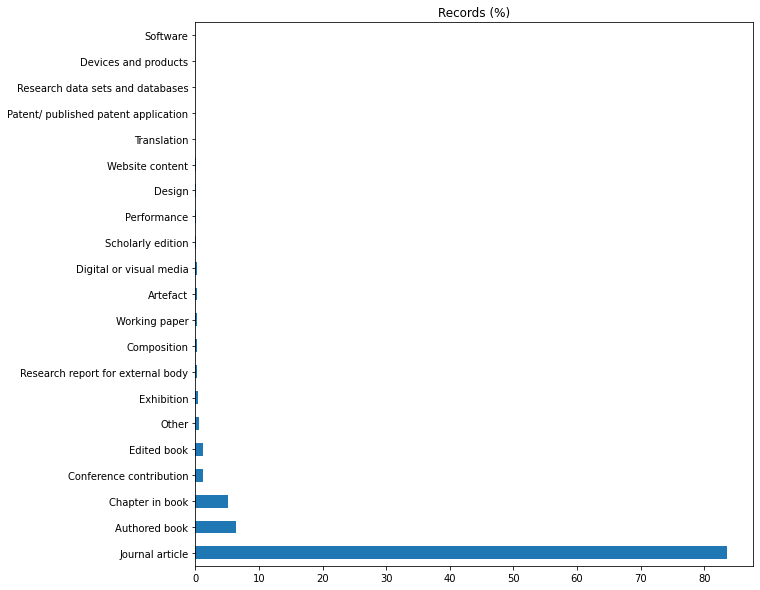


                                           Records  Records (%)
Open access status                                             
Compliant                                    85913        46.35
Out of scope for open access requirements    58482        31.55
Not specified - PP ADDED                     24173        13.04
Technical exception                           4879         2.63
Deposit exception                             4748         2.56
Exception within 3 months of publication      2581         1.39
Not compliant                                 2401         1.30
Access exception                              1166         0.63
Other exception                               1010         0.54


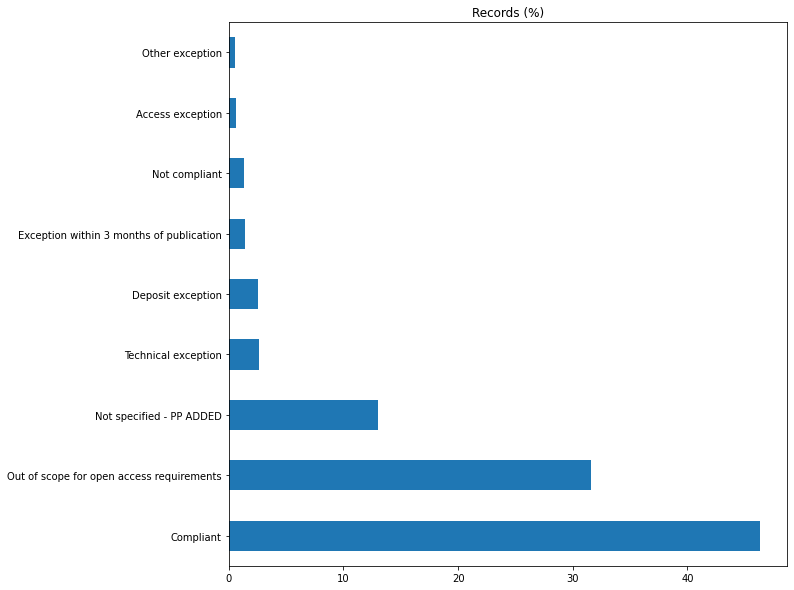

In [4]:
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)

for column in [cb.COL_OUTPUT_TYPE_NAME, cb.COL_OPEN_ACCESS]:
    vis.calculate_and_visualise_counts(dset, column, do_plot="perc")

#### Records with `Output type` as _Software_

In [5]:
type_of_interest = "Software"
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
dset = dset[dset[cb.COL_OUTPUT_TYPE_NAME] == type_of_interest].copy()
print(f"\n'{cb.COL_OUTPUT_TYPE_NAME}' as '{type_of_interest}' - {dset.shape[0]} records")

for column in [cb.COL_OPEN_ACCESS,
               cb.COL_OUTPUT_INTERDISCIPLINARY,
               cb.COL_INST_NAME,
               cb.COL_PANEL_NAME,
               cb.COL_OUTPUT_CITATIONS,
               cb.COL_OUTPUT_SUPP]:
    vis.calculate_and_visualise_counts(dset, column)

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

'Output type name' as 'Software' - 11 records

                          Records  Records (%)
Open access status                            
Not specified - PP ADDED       11       100.00

                          Records  Records (%)
Interdisciplinary                             
Not specified - PP ADDED        8        72.73
Yes                             3        27.27

                                Records  Records (%)
Institution name                                    
University College London             2        18.18
University of Exeter                  2        18.18
University of Ulster                  1         9.09
Leeds Beckett University              1         9.09
The University of Manchester          1         9.09
University of Edinburgh               1         9.09
Heriot-Watt University                1         9.09
University of Cambridge               1         9.09
University of the Arts, Lo

#### Records with `computation` in `Title`

In [6]:
term_of_interest = "computation"
(dset, _) = rw.get_data(rw.DATA_PPROC_OUTPUTS)
dset = dset[dset[cb.COL_OUTPUT_TITLE].str.contains(term_of_interest, case=False)].copy()
print(f"\n'{cb.COL_OUTPUT_TITLE}' containing '{term_of_interest}' - {dset.shape[0]} records")

for column in [cb.COL_OUTPUT_TYPE_NAME, 
               cb.COL_OPEN_ACCESS,
               cb.COL_OUTPUT_INTERDISCIPLINARY,
               cb.COL_PANEL_NAME,
               cb.COL_INST_NAME]:
    vis.calculate_and_visualise_counts(dset, column)

Read data/processed/Outputs_ppreprocessed.csv.gz: 185353 records

'Title' containing 'computation' - 596 records

                         Records  Records (%)
Output type name                             
Journal article              560        93.96
Conference contribution       22         3.69
Authored book                  8         1.34
Chapter in book                4         0.67
Edited book                    1         0.17
Working paper                  1         0.17

                                           Records  Records (%)
Open access status                                             
Compliant                                      327        54.87
Out of scope for open access requirements      200        33.56
Not specified - PP ADDED                        20         3.36
Deposit exception                               14         2.35
Technical exception                             12         2.01
Not compliant                                    7         1.17
Excep

## `ImpactCaseStudies` data

#### All records

Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

                                                Records  Records (%)
Main panel name                                                     
Social sciences                                    2146        33.74
Arts and humanities                                1528        24.02
Medicine, health and life sciences                 1419        22.31
Physical sciences, engineering and mathematics     1268        19.93


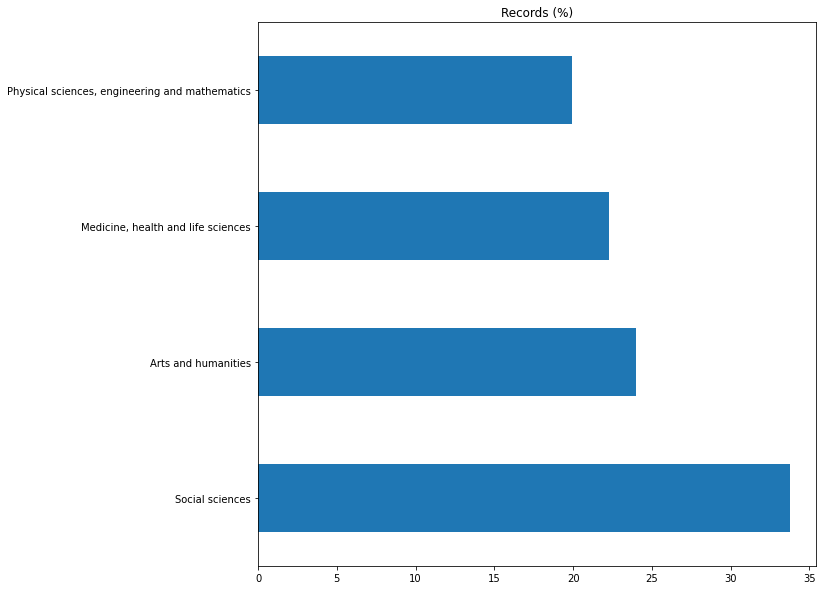

In [7]:
(dset, _) = rw.get_data(rw.DATA_PPROC_IMPACTS)

for column in [cb.COL_PANEL_NAME]:
    vis.calculate_and_visualise_counts(dset, column, do_plot="perc")

#### Records with `computation` in `Title` or `Summary`

In [8]:
term_of_interest = "computation"
(dset, _) = rw.get_data(rw.DATA_PPROC_IMPACTS)

# select rows containing the term of interest in title or summary
dset = dset[dset[cb.COL_IMPACT_TITLE].str.contains(term_of_interest, case=False) |
            dset[cb.COL_IMPACT_SUMMARY].str.contains(term_of_interest, case=False)
            ].copy()
print(f"\n'{cb.COL_IMPACT_TITLE}' or '{cb.COL_IMPACT_SUMMARY}' containing '{term_of_interest}' - {dset.shape[0]} records")


for column in [cb.COL_PANEL_NAME,
               cb.COL_INST_NAME]:
    vis.calculate_and_visualise_counts(dset, column)

print(f"\nTitles of impact case studies with '{term_of_interest}' in '{cb.COL_IMPACT_TITLE}' or '{cb.COL_IMPACT_SUMMARY}':\n")
for irow, row in dset.iterrows():
    print(f"{row[cb.COL_INST_NAME]}, {row[cb.COL_PANEL_NAME]}:\n {row[cb.COL_IMPACT_TITLE]}\n")

Read data/processed/ImpactCaseStudies_ppreprocessed.csv.gz: 6361 records

'Title' or '1. Summary of the impact' containing 'computation' - 60 records

                                                Records  Records (%)
Main panel name                                                     
Physical sciences, engineering and mathematics       45        75.00
Arts and humanities                                   5         8.33
Medicine, health and life sciences                    5         8.33
Social sciences                                       5         8.33

                                                      Records  Records (%)
Institution name                                                          
University of Oxford                                        4         6.67
Imperial College of Science, Technology and Medicine        4         6.67
The University of Reading                                   3         5.00
King's College London                                      

## `Results` data

In [7]:
(dset, _) = rw.get_data(rw.DATA_PPROC_RESULTS)

Read data/processed/Results_ppreprocessed.csv.gz: 7552 records
